In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as path_assistant
shift = path_assistant.PathAssistant('shift_03_05_2020', ignore_files=['background_000.ptu'])
#shift.show_time_stamp_file_names()
time_stamp_files_dir = shift.get_time_stamp_files_dir()

In [2]:
files = shift.get_shift_files()[:8]
files

['6el_filters_002.ptu',
 '3el_filters_001.ptu',
 '2el_filters_007.ptu',
 '3el_filters_000.ptu',
 '2el_filters_006.ptu',
 '6el_filters_003.ptu',
 '6el_filters_001.ptu',
 '2el_filters_004.ptu']

working on 1el_filters_000.ptu


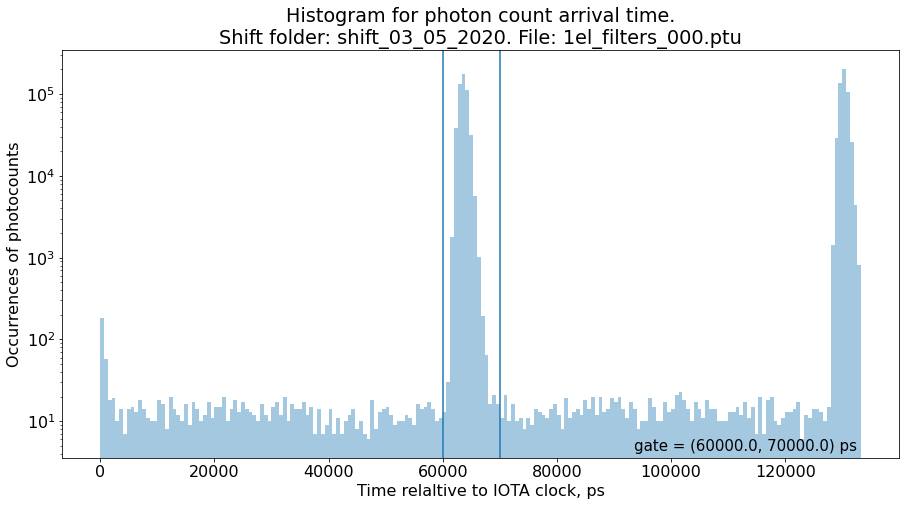

p_measured = 0.0033241743099424446
chunk_length = 3000829
n_events = 498764
fano_interval = (-0.003390396453779587, -0.0032517680947511396)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.003338910681016327
fano_mean = -0.0033241747530434874
absolute_fano_error = 6.93141795142238e-05


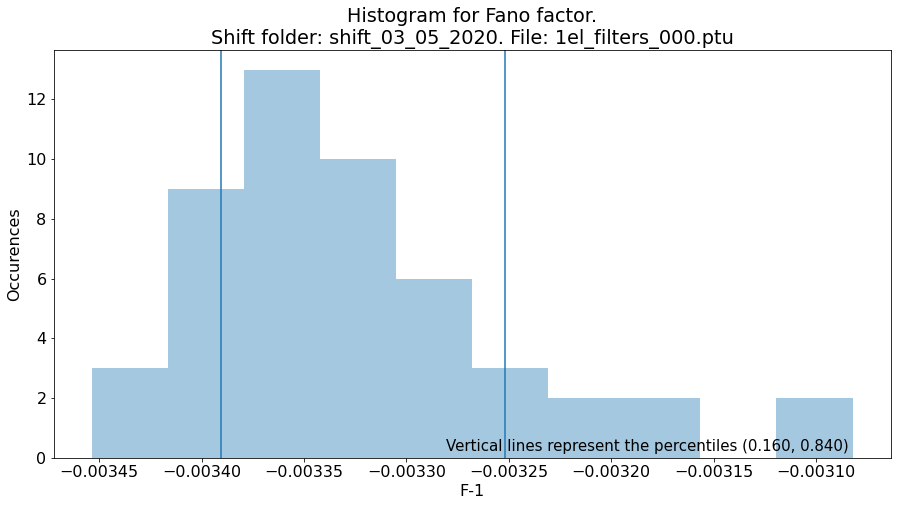

working on 1el_filters_001.ptu


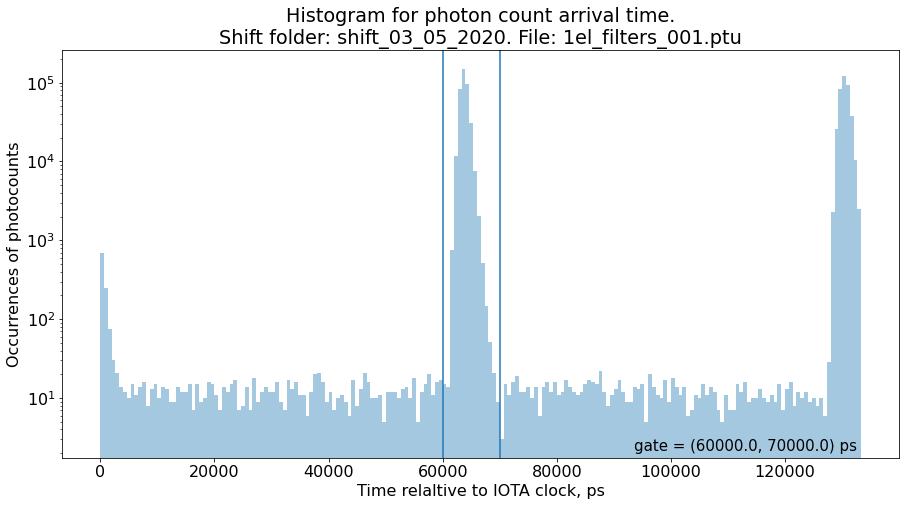

p_measured = 0.00255655191774918
chunk_length = 3000823
n_events = 383588
fano_interval = (-0.0025866237362222044, -0.002529639368932135)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.0025504669885560993
fano_mean = -0.002556551985905051
absolute_fano_error = 2.8492183645034697e-05


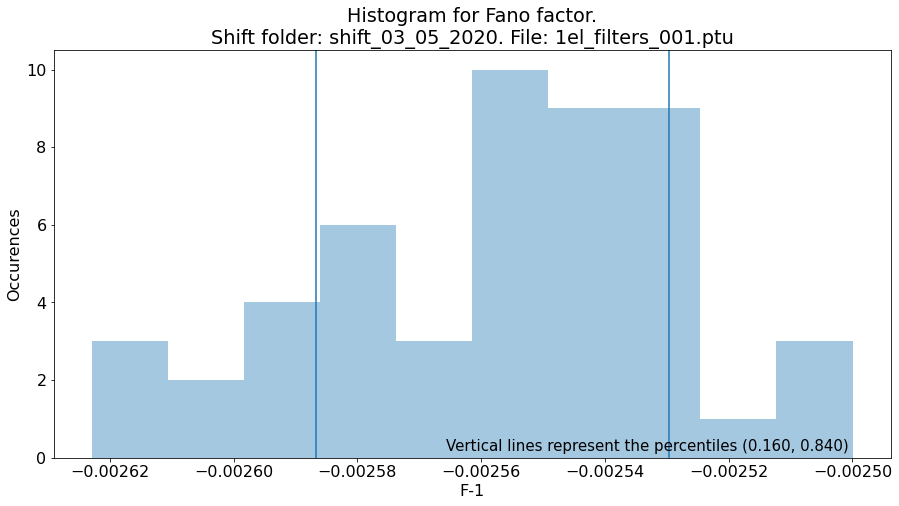

working on 1el_filters_002.ptu


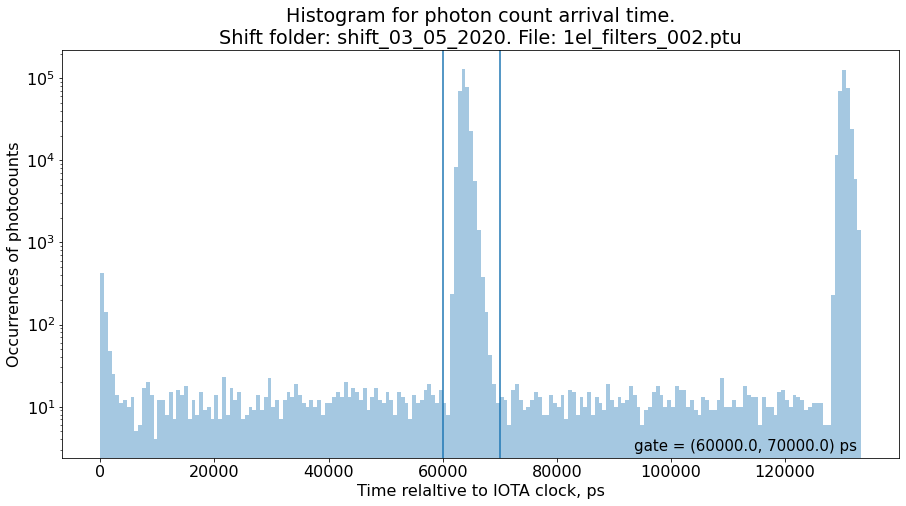

p_measured = 0.0021058640723515035
chunk_length = 3000829
n_events = 315967
fano_interval = (-0.0021367428800503907, -0.0020754264904806474)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.002104751720275022
fano_mean = -0.0021058647460420322
absolute_fano_error = 3.065819478487164e-05


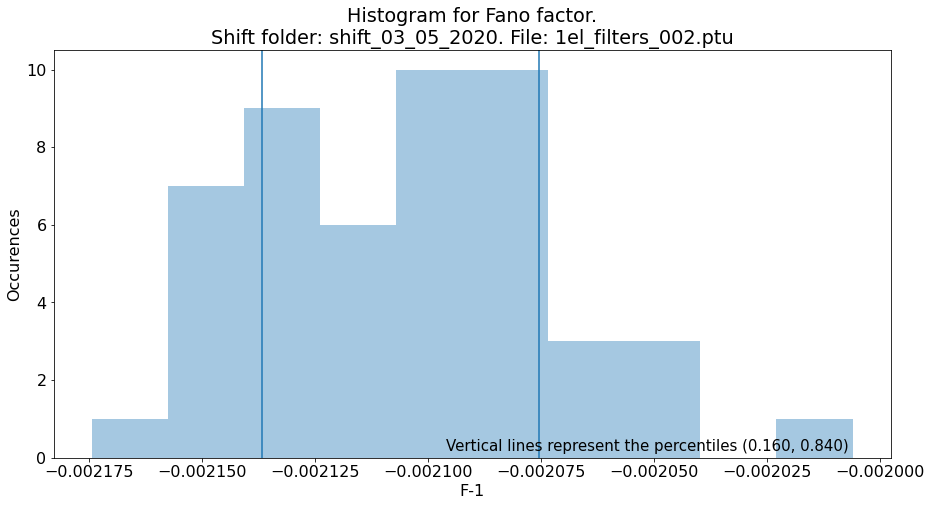

working on 1el_filters_003.ptu


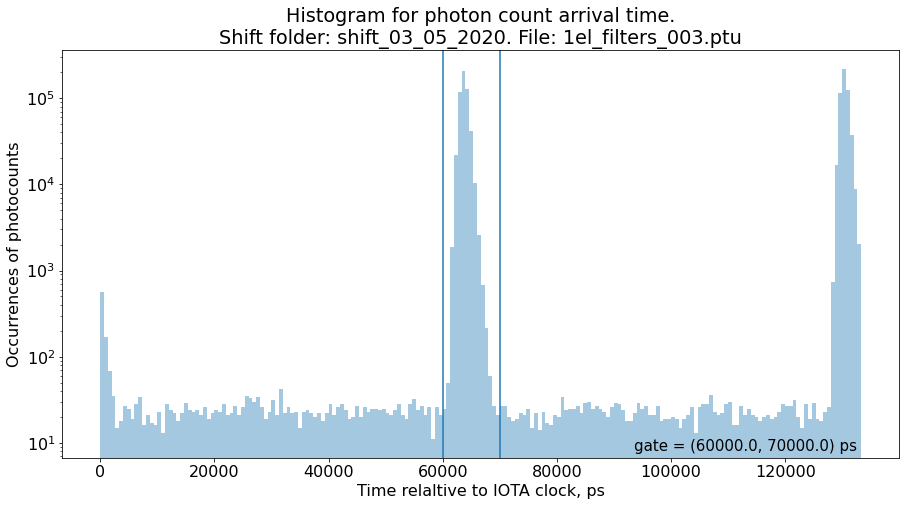

p_measured = 0.0017588463498188166
chunk_length = 6001661
n_events = 527800
fano_interval = (-0.0017783410292586677, -0.0017310207957433876)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.001759762838986989
fano_mean = -0.0017588464260142379
absolute_fano_error = 2.3660116757640015e-05


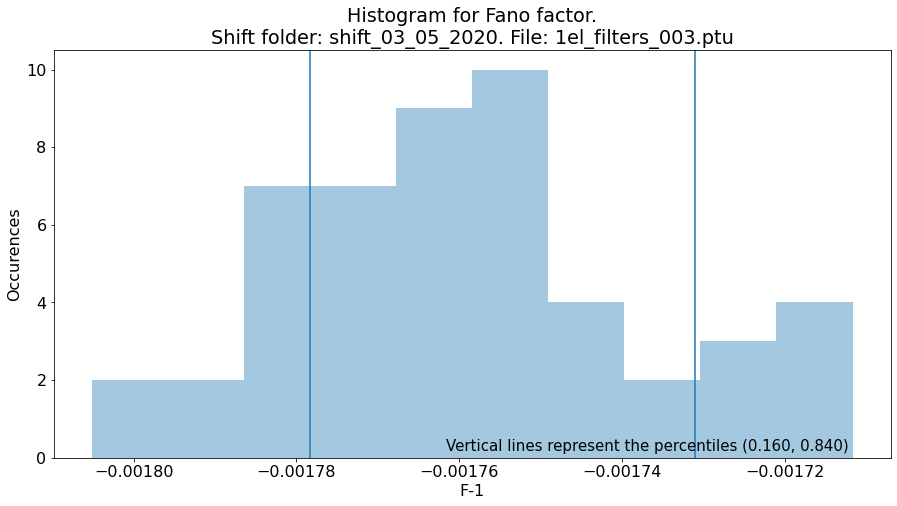

working on 1el_filters_004.ptu


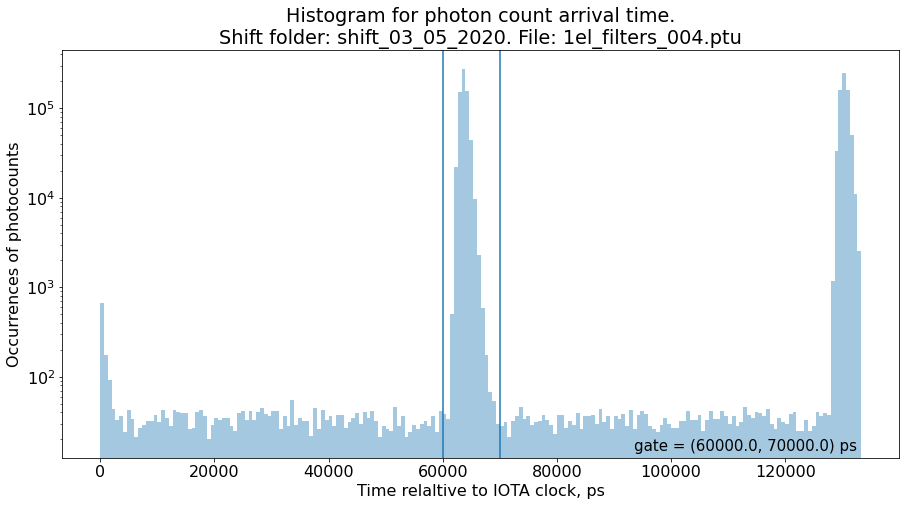

p_measured = 0.0014830422222333055
chunk_length = 9002467
n_events = 667552
fano_interval = (-0.0014957011228149408, -0.0014674866344984716)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.0014826491449513868
fano_mean = -0.0014830423704972318
absolute_fano_error = 1.4107244158234611e-05


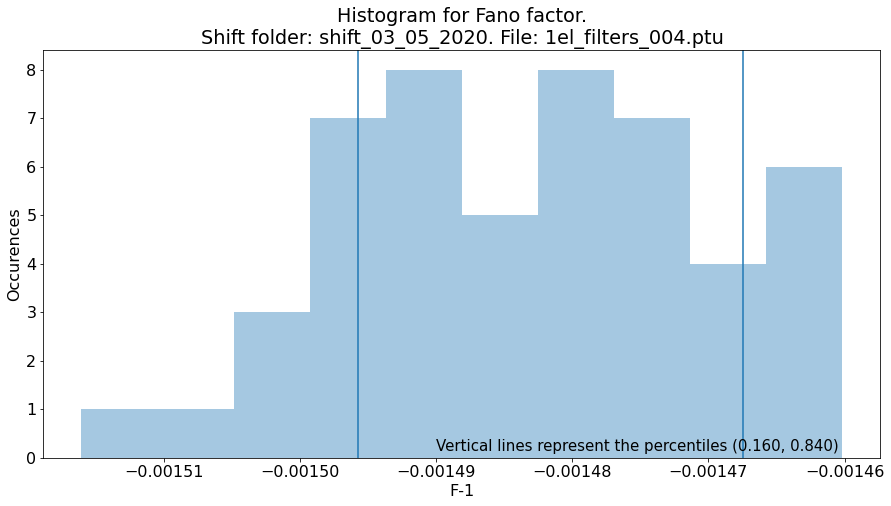

working on 1el_filters_005.ptu


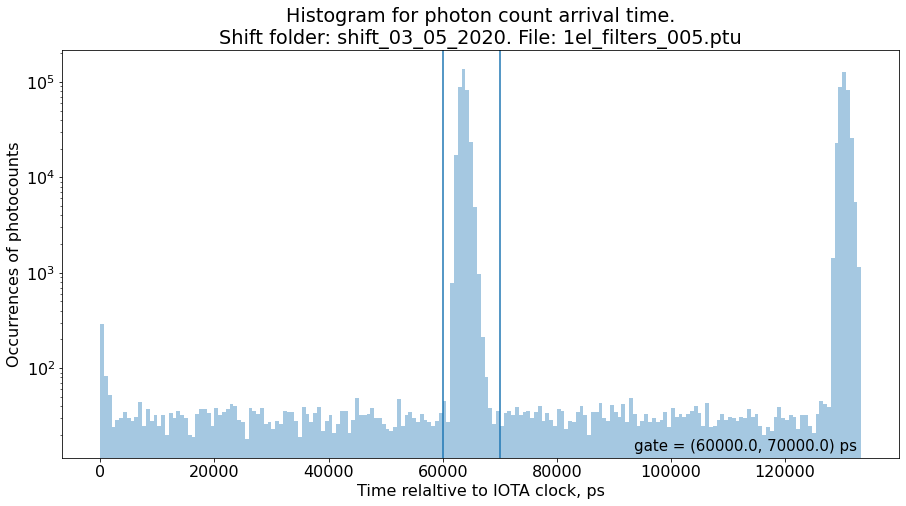

p_measured = 0.0007895836970382299
chunk_length = 9002490
n_events = 355411
fano_interval = (-0.0007974460399261529, -0.0007803396615684299)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.0007906701368226021
fano_mean = -0.0007895837707109732
absolute_fano_error = 8.553189178861498e-06


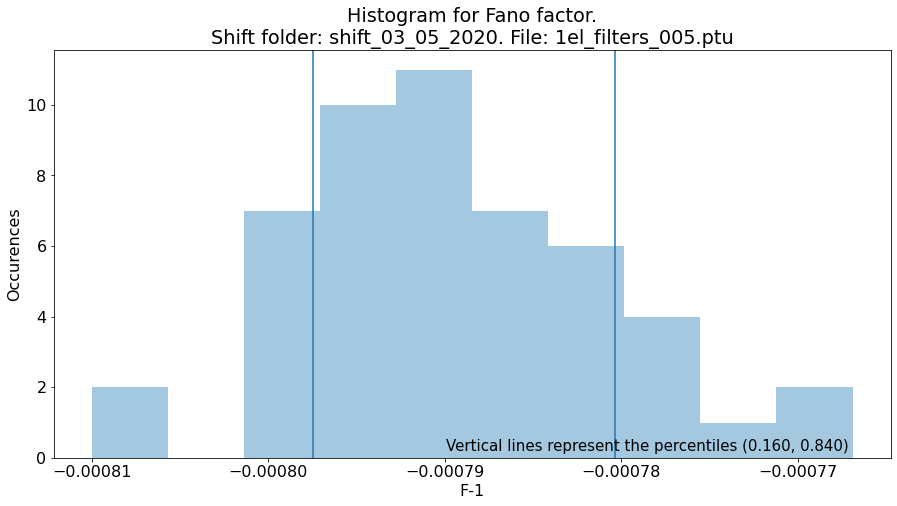

working on 1el_filters_006.ptu


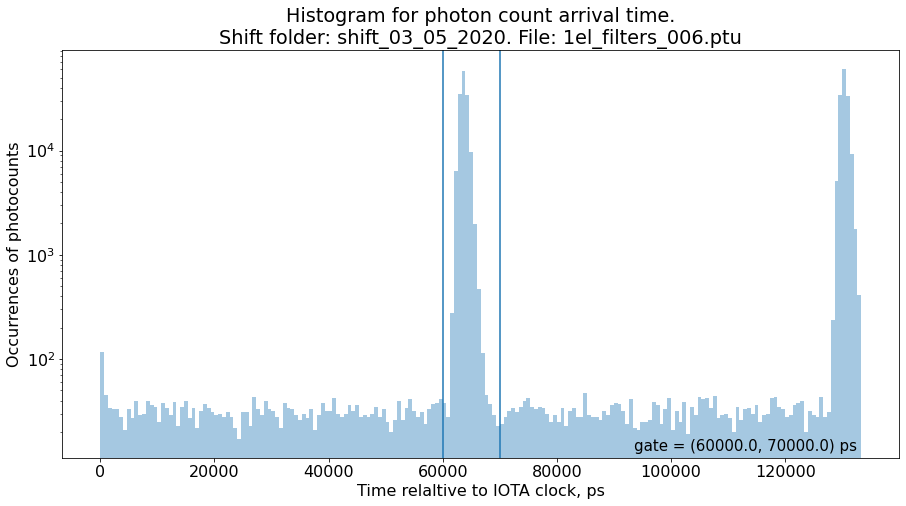

p_measured = 0.00032486912893373715
chunk_length = 9002455
n_events = 146231
fano_interval = (-0.00033002108869295554, -0.00031902408841510965)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.000326355421935709
fano_mean = -0.00032486916068869443
absolute_fano_error = 5.498500138922946e-06


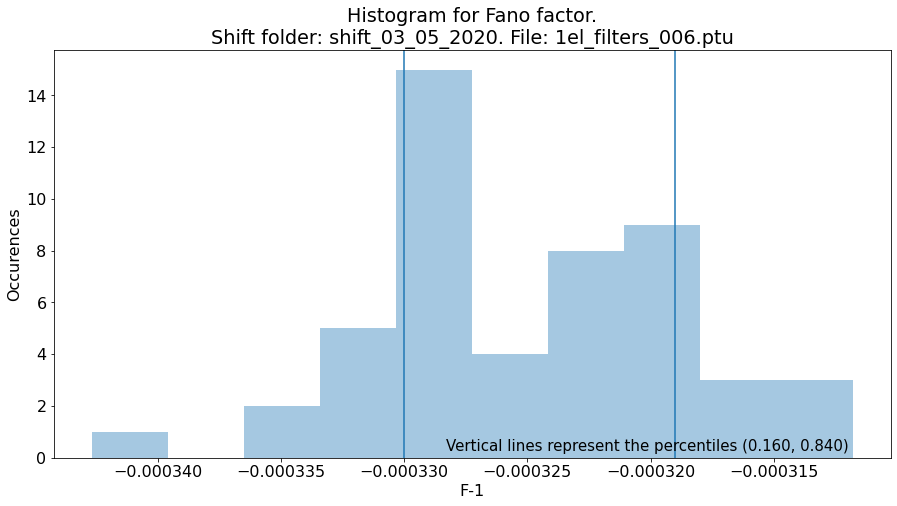

working on 1el_filters_007.ptu


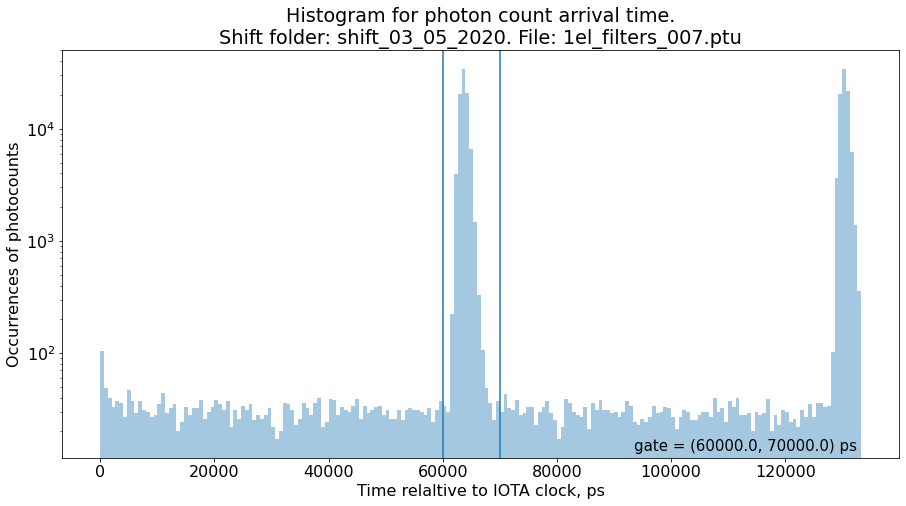

p_measured = 0.00019655935507683926
chunk_length = 9002471
n_events = 88476
fano_interval = (-0.0002005005070259136, -0.00019105865490476326)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.00019727916924139333
fano_mean = -0.00019655936686641785
absolute_fano_error = 4.72092606057517e-06


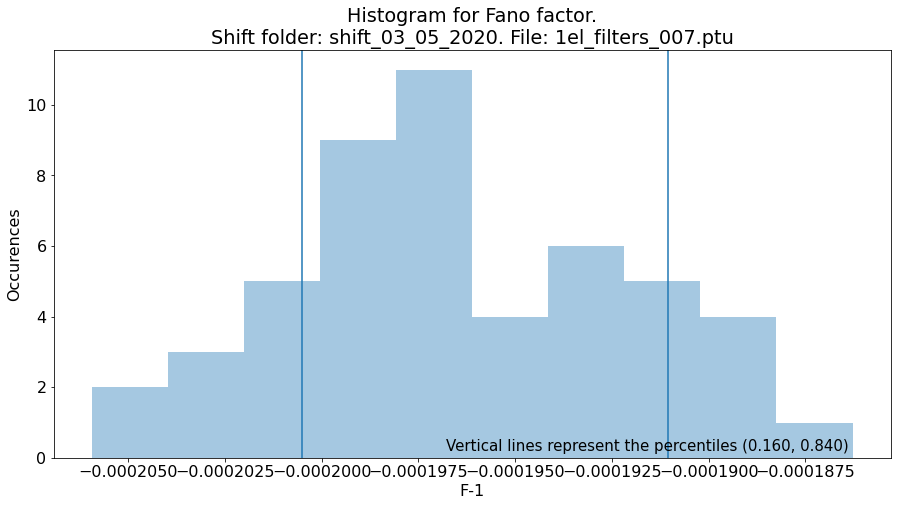

In [3]:
res = []
for f in files:
    try:
        print(f"working on {f}")
        df, n_revolutions = read_event_delays(shift.get_time_stamp_file_path(f))
        gate = (60000,70000)
        t_delays = df.delay
        plot_arrival_time_hist(t_delays, gate, bins=200, shift_folder_name=shift.shift_folder_name,
            time_stamp_file_name=f)
        events = get_events_array(df, n_revolutions, gate)
        fanos, report = get_fanos(events, n_revolutions)
        plot_fanos_hist(fanos, report, bins=10, shift_folder_name=shift.shift_folder_name,
                        time_stamp_file_name=f)
        res.append({'file': f, 'fanos': fanos, 'report': report})
    except Exception as e:
        print(f'exception happened: {e}')

In [4]:
res

[{'file': '1el_filters_000.ptu',
  'fanos': array([-0.00345371, -0.00342339, -0.00342139, -0.00340573, -0.00340006,
         -0.00339639, -0.0033944 , -0.00339073, -0.0033904 , -0.00339006,
         -0.00338706, -0.00338706, -0.00337873, -0.00337773, -0.00337473,
         -0.00337307, -0.00337107, -0.0033704 , -0.0033644 , -0.0033624 ,
         -0.00336107, -0.00335941, -0.00335041, -0.00334341, -0.00334308,
         -0.00333475, -0.00333175, -0.00333141, -0.00333108, -0.00333008,
         -0.00332441, -0.00331975, -0.00331775, -0.00331575, -0.00331508,
         -0.00329876, -0.00328876, -0.00328676, -0.00328543, -0.00327509,
         -0.0032691 , -0.00325743, -0.00325177, -0.00324377, -0.00320945,
         -0.00319512, -0.00317512, -0.00315913, -0.00310881, -0.00308215]),
  'report': {'p_measured': 0.0033241743099424446,
   'chunk_length': 3000829,
   'n_events': 498764,
   'fano_interval': (-0.003390396453779587, -0.0032517680947511396),
   'fano_interval_percentiles': (0.16, 0.84),


In [8]:
tips = sns.load_dataset("tips")

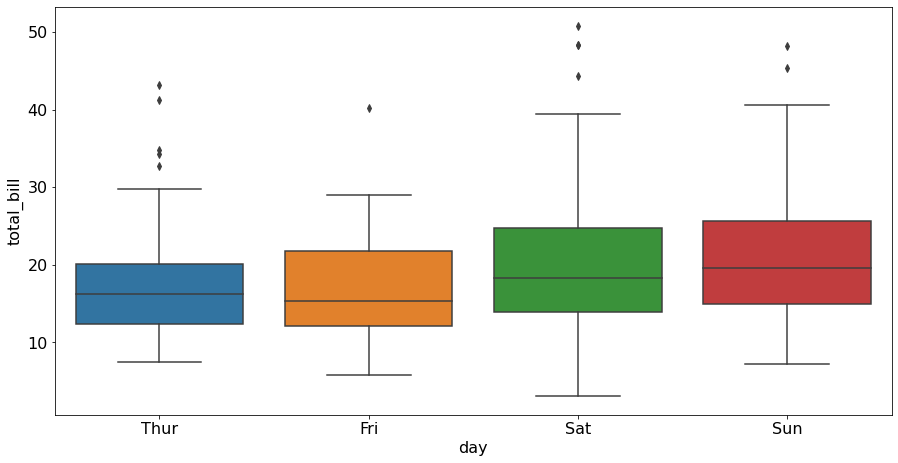

In [9]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [18]:
p0 = res[0]['report']['p_measured']

In [56]:
dfs = []
etas = []
for r in res:
    df = pd.DataFrame({'F-1': r['fanos']})
    eta = r['report']['p_measured']/p0
    df['eta'] = eta
    etas.append(eta)
    dfs.append(df)

In [57]:
plot_df = pd.concat(dfs, ignore_index=True)

In [60]:
etas

[1.0,
 0.7690787784812176,
 0.633499893809108,
 0.5291077379902107,
 0.4461385246247761,
 0.23752776582040938,
 0.09772927008131592,
 0.05913027920615947]

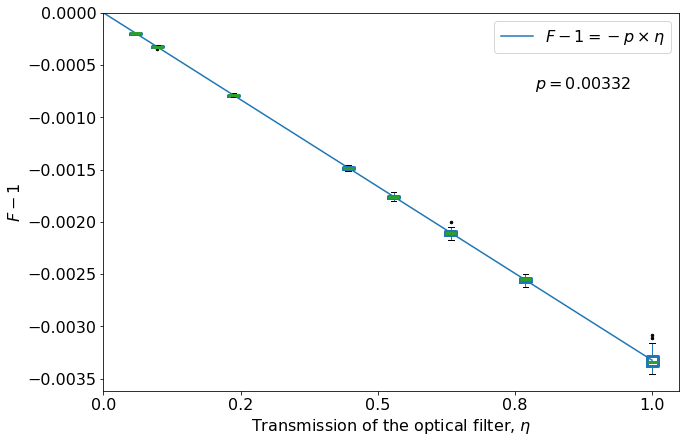

In [135]:
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
fig, ax  = plt.subplots(figsize=(10,7))
flierprops = dict(marker='.', markerfacecolor='black', markersize=5,
                  linestyle='none')
boxprops = dict(linewidth=3, color='black')
medianprops = dict(linestyle='-.', linewidth=3, color='firebrick')
plot_df.boxplot(by='eta', column=['F-1'], widths=0.02, grid=False, boxprops=boxprops,
                positions=etas[::-1], ax=ax, flierprops=flierprops, medianprops=medianprops)
xticks = np.linspace(0,1,5)
ax.set_xlim(-0.0,1.05)
plt.xticks(xticks, labels=['{:.1f}'.format(t) for t in xticks])
ax.set_title('')
fig.suptitle('')
ax.set_xlabel('Transmission of the optical filter, $\eta$')
ax.set_ylabel('$F-1$')
ax.set_ylim(ax.get_ylim()[0],0)
x_p0 = np.linspace(0,1,10)
ax.plot(x_p0, -p0*x_p0, label=r'$F-1=-p\times\eta$')
ax.text(0.75,0.8,'$p=$'+f'{p0:.5f}',transform=ax.transAxes)
ax.legend()
plt.show()

In [40]:
errorbar_df = pd.DataFrame(columns=['p', 'eta', 'F-1', 'err-','err+'], index=range(len(res)))
for i, r in enumerate(res):
    rep = r['report']
    errorbar_df.iloc[i,:] =[
        rep['p_measured'],
        rep['p_measured']/p0,
        rep['fano_mean'],
        rep['fano_mean']-min(r['fanos']),#rep['fano_mean']-rep['fano_interval'][0],
        max(r['fanos'])-rep['fano_mean']#rep['fano_interval'][1]-rep['fano_mean']
    ]

In [41]:
errorbar_df

,p,eta,F-1,err-,err+
0,0.00332417,1,-0.00332417,0.000129538,0.000242026
1,0.00255655,0.769079,-0.00255655,6.63951e-05,5.65711e-05
2,0.00210586,0.6335,-0.00210586,6.85344e-05,9.97524e-05
3,0.00175885,0.529108,-0.00175885,4.63205e-05,4.71536e-05
4,0.00148304,0.446139,-0.00148304,3.29865e-05,2.28871e-05
5,0.000789584,0.237528,-0.000789584,2.04144e-05,2.26848e-05
6,0.000324869,0.0977293,-0.000324869,1.78151e-05,1.30653e-05
7,0.000196559,0.0591303,-0.000196559,9.38409e-06,1.02772e-05


<ErrorbarContainer object of 3 artists>

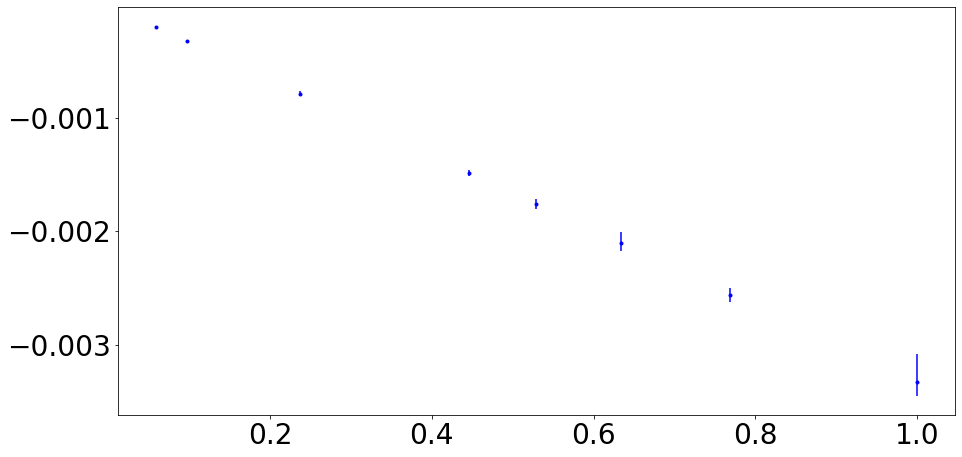

In [43]:
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(errorbar_df['eta'], errorbar_df['F-1'],marker='o', markersize=3, linestyle='None',
            yerr=errorbar_df.loc[:,['err-', 'err+']].values.T,color='b', label = r'Measurements @$V_{\mathrm{rf}}=360$V')

In [34]:
errorbar_df.loc[:,['err-', 'err+']].values.T

array([[6.622170073609978e-05, 3.0071750317153464e-05,
        3.087813400835847e-05, 1.9494603244429778e-05,
        1.2658752317709025e-05, 7.862269215179745e-06,
        5.151928004261115e-06, 3.941140159495753e-06],
       [7.240665829234784e-05, 2.691261697291593e-05,
        3.0438255561384808e-05, 2.7825630270850252e-05,
        1.5555735998760197e-05, 9.244109142543251e-06,
        5.845072273584777e-06, 5.500711961654587e-06]], dtype=object)